In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-trending-video-dataset/MX_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/GB_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/BR_category_id.json
/kaggle/input/youtube-trending-video-dataset/FR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/MX_category_id.json
/kaggle/input/youtube-trending-video-dataset/GB_category_id.json
/kaggle/input/youtube-trending-video-dataset/US_category_id.json
/kaggle/input/youtube-trending-video-dataset/BR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_category_id.json
/kaggle/input/youtube-trending-video-dataset/KR_category_id.json
/kaggle/input/youtube-trending-video-dataset/DE_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_category_id.json
/kaggle/input/youtube-trend

I am doing the analysis for Trending Data in India. Same analysis can be done for remaninig countries by just reading the different csv file.

In [2]:
df = pd.read_csv("/kaggle/input/youtube-trending-video-dataset/IN_youtube_trending_data.csv")
df.sample(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
7748,ZQZhyhTf5-s,FULL MATCH - Seth Rollins vs. Braun Strowman –...,2020-09-20T13:00:06Z,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,17,2020-09-21T00:00:00Z,wwe|world wrestling entertainment|wrestling|wr...,1507097,41189,2048,2007,https://i.ytimg.com/vi/ZQZhyhTf5-s/default.jpg,False,False,After losing the Raw Tag Team Championship ear...
11207,kirV2-iFq7o,ನೋವಿನ ನಡುವೆ ಚಿರು ಮನೆಯಲ್ಲಿ ಸಂಭ್ರಮ ! ನಟಿ ಮೇಘನಾ ರ...,2020-10-04T10:56:12Z,UC55LzMuR6ZeSpJMNCAfzb8w,Btv News Kannada Ɩ ಬಿಟಿವಿ ನ್ಯೂಸ್ ಕನ್ನಡ,25,2020-10-09T00:00:00Z,#BtvNewsLive|#BtvKannada,540440,5075,391,258,https://i.ytimg.com/vi/kirV2-iFq7o/default.jpg,False,False,Btv News Kannada : ನೋವಿನ ನಡುವೆ ಚಿರು ಮನೆಯಲ್ಲಿ ಸ...
3793,msmjZFVWgSk,"Realme 7 Series India Price,Oneplus Clover Lau...",2020-08-28T12:30:09Z,UC8vlDm5xvbxOrCvdu9UNOiA,Techno Ruhez,28,2020-08-31T00:00:00Z,oneplus nord lite|oneplus nord|tiktok banned|t...,262299,41380,751,2272,https://i.ytimg.com/vi/msmjZFVWgSk/default.jpg,False,False,Hello Everyone Welcome To My Daily Tech News #...
12559,czJKZsi3pGA,My Name is Raju - Official Teaser | PRK Short ...,2020-10-14T12:30:13Z,UCPSb5hoJuGd_M421vocSM2A,PRK Audio,1,2020-10-16T00:00:00Z,prk audio|prk|prk productions|short film|kanna...,44760,3485,52,231,https://i.ytimg.com/vi/czJKZsi3pGA/default.jpg,False,False,Presenting You the Official Teaser of First PR...
27796,sM72Q8a09W8,My Kitchen Tour | Kitchen Organisation ideas |...,2021-01-09T12:30:12Z,UCzKchRiaC4wpClE1wQzex8w,Its VG,26,2021-01-10T00:00:00Z,My Kitchen Tour|kitchen tour|kitchen organizat...,192822,6372,291,313,https://i.ytimg.com/vi/sM72Q8a09W8/default.jpg,False,False,Download CashKaro App- https://cashk.app.link/...


In this notebook, Let's try to find some insights from the Youtube Trending Dataset.
I am trying to find answers for following Questions.
1. Which Category Videos are being watched and are in trending for most of the times? (Categories such as: Movies, Education,Videoblogging, etc)
2. What's the average time taken for a video to be in trending categorically?
3. What's the average no.of views required to enter into trending?
4. Which Youtube channel in India has more videos in Trending?
5. Understanding the significance of Likes,Dislikes and Comments.

Let's read the Categorical Json file which can used later on for analysis

In [3]:
import re
k = open("/kaggle/input/youtube-trending-video-dataset/IN_category_id.json").read()
Category_list = re.findall(r"title\": \"(.*)\"", k)
categories = {i+1:Category_list[i] for i in range(len(Category_list))}
categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 3: 'Music',
 4: 'Pets & Animals',
 5: 'Sports',
 6: 'Short Movies',
 7: 'Travel & Events',
 8: 'Gaming',
 9: 'Videoblogging',
 10: 'People & Blogs',
 11: 'Comedy',
 12: 'Entertainment',
 13: 'News & Politics',
 14: 'Howto & Style',
 15: 'Education',
 16: 'Science & Technology',
 17: 'Movies',
 18: 'Anime/Animation',
 19: 'Action/Adventure',
 20: 'Classics',
 21: 'Comedy',
 22: 'Documentary',
 23: 'Drama',
 24: 'Family',
 25: 'Foreign',
 26: 'Horror',
 27: 'Sci-Fi/Fantasy',
 28: 'Thriller',
 29: 'Shorts',
 30: 'Shows',
 31: 'Trailers'}

In [4]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,62072.000000,6.207200e+04,6.207200e+04,6.207200e+04,6.207200e+04
mean,20.729637,2.797538e+06,1.354419e+05,7.043854e+03,1.418464e+04
std,6.253992,7.531704e+06,4.410565e+05,1.445098e+05,1.212382e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,4.083698e+05,1.396700e+04,5.190000e+02,6.810000e+02
50%,24.000000,9.596030e+05,3.782650e+04,1.359000e+03,2.045000e+03
75%,24.000000,2.336465e+06,1.032012e+05,3.684000e+03,6.513250e+03
max,29.000000,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62072 entries, 0 to 62071
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           62072 non-null  object
 1   title              62072 non-null  object
 2   publishedAt        62072 non-null  object
 3   channelId          62072 non-null  object
 4   channelTitle       62071 non-null  object
 5   categoryId         62072 non-null  int64 
 6   trending_date      62072 non-null  object
 7   tags               62072 non-null  object
 8   view_count         62072 non-null  int64 
 9   likes              62072 non-null  int64 
 10  dislikes           62072 non-null  int64 
 11  comment_count      62072 non-null  int64 
 12  thumbnail_link     62072 non-null  object
 13  comments_disabled  62072 non-null  bool  
 14  ratings_disabled   62072 non-null  bool  
 15  description        60784 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

Let's check the no.of records for a random video: wzpLZWWEA4w

In [6]:
df[df.video_id=="wzpLZWWEA4w"]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
60571,wzpLZWWEA4w,TRAFFIC JAM KI KAHANI || JaiPuru,2021-06-28T07:07:32Z,UCByS1f-QpAsgUbFb6qSNGZw,JaiPuru,24,2021-06-29T00:00:00Z,jaipuru|jaipuru new video|indians on traffic j...,245904,8367,757,688,https://i.ytimg.com/vi/wzpLZWWEA4w/default.jpg,False,False,"Download India's simplest Bitcoin app, CoinDCX..."
60762,wzpLZWWEA4w,TRAFFIC JAM KI KAHANI || JaiPuru,2021-06-28T07:07:32Z,UCByS1f-QpAsgUbFb6qSNGZw,JaiPuru,24,2021-06-30T00:00:00Z,jaipuru|jaipuru new video|indians on traffic j...,322692,9705,947,764,https://i.ytimg.com/vi/wzpLZWWEA4w/default.jpg,False,False,"Download India's simplest Bitcoin app, CoinDCX..."
60992,wzpLZWWEA4w,TRAFFIC JAM KI KAHANI || JaiPuru,2021-06-28T07:07:32Z,UCByS1f-QpAsgUbFb6qSNGZw,JaiPuru,24,2021-07-01T00:00:00Z,jaipuru|jaipuru new video|indians on traffic j...,390296,10640,1104,763,https://i.ytimg.com/vi/wzpLZWWEA4w/default.jpg,False,False,"Download India's simplest Bitcoin app, CoinDCX..."
61229,wzpLZWWEA4w,TRAFFIC JAM KI KAHANI || JaiPuru,2021-06-28T07:07:32Z,UCByS1f-QpAsgUbFb6qSNGZw,JaiPuru,24,2021-07-02T00:00:00Z,jaipuru|jaipuru new video|indians on traffic j...,451313,11376,1241,779,https://i.ytimg.com/vi/wzpLZWWEA4w/default.jpg,False,False,"Download India's simplest Bitcoin app, CoinDCX..."
61473,wzpLZWWEA4w,TRAFFIC JAM KI KAHANI || JaiPuru,2021-06-28T07:07:32Z,UCByS1f-QpAsgUbFb6qSNGZw,JaiPuru,24,2021-07-03T00:00:00Z,jaipuru|jaipuru new video|indians on traffic j...,502226,11946,1332,801,https://i.ytimg.com/vi/wzpLZWWEA4w/default.jpg,False,False,"Download India's simplest Bitcoin app, CoinDCX..."


Details inferred:
1. Same video can be there multiple times in dataset as the video can stay in trending for many consequtive days.
2. View Count,Likes and Dislikes Change as the time prolongs. So we shouldn't do group by on a Video_Id and add all the view_Counts,Likes,Dislikes as those will be repeated.

Though there are 61474 entries, no.of unique videos are: 17411

In [7]:
df.video_id.nunique()

17582

2219 Unique Channels

In [8]:
df.channelTitle.nunique()

2234

In [9]:
df.sample()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
25737,JRsTj_otOa4,HONDA GADI FULL VIDE0 4K//JONY & PRERNA//RAJU...,2020-12-23T12:00:10Z,UCLr8DWMx4Kk5yAi8cacVpYw,Raju Soren,24,2020-12-28T00:00:00Z,[None],1324437,24314,1982,1891,https://i.ytimg.com/vi/JRsTj_otOa4/default.jpg,False,False,Song Title - Honda Gadi Sponsored By - Bikes I...


Removing unnecessary columns for further analysis

In [10]:
df.drop(["channelId","thumbnail_link","ratings_disabled","comments_disabled","description","tags"], inplace=True, axis=1)

For further Analysis, Let's gather enough details


df_maxViews stores the last occurance of VideoID. 
Intuition: Gathering final views,likes,comments before relegating from Trending data.

In [11]:
df_maxViews = df.sort_values('view_count', ascending=False).drop_duplicates(['video_id'])
df_maxViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count
49005,eqFMDBV3GeQ,Radhe Title Track Song REACTION | Deeksha Sharma,2021-05-05T10:04:43Z,Filmi Indian,24,2021-05-06T00:00:00Z,354583,30697,4854,2572
19485,PjaXxuZETns,Dil Maang Raha Hai Mohlat | Heart Touching Lov...,2020-11-22T07:59:27Z,Samrat Creation,24,2020-11-24T00:00:00Z,61142,2193,94,132
48903,LM-U-Ca61aU,MY NEW SUPERBIKES DELIVERY !!!,2021-05-01T16:00:01Z,Mo Vlogs,22,2021-05-05T00:00:00Z,854269,58388,2044,2572
35800,5JMTp9s1bgA,OMEGLE IS SO FUNNY,2021-02-21T14:47:55Z,Mythpat,24,2021-02-24T00:00:00Z,3678258,504990,3994,34901
25753,2ye0GVSaw5o,TESTING LIFE HACKS WITH MY BROTHER & SISTER GR...,2020-12-24T13:50:40Z,Rimorav Vlogs,24,2020-12-28T00:00:00Z,2025790,240662,3057,17144


df_minViews stores the data of a video entering into trending videos for the first time

In [12]:
df_minViews = df.sort_values('view_count', ascending=True).drop_duplicates(['video_id'])
df_minViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count
29253,uuNfVzl9l6U,Positions | Ariana Grande | Dance Choreography...,2021-01-16T11:30:05Z,LiveToDance with Sonali,24,2021-01-17T00:00:00Z,53983,7152,263,567
14302,pqozg9Tchc4,"PM Modi's Mann Ki Baat with the Nation, Octobe...",2020-10-25T06:06:21Z,Narendra Modi,25,2020-10-25T00:00:00Z,109430,13881,4618,1590
10862,lTzEtoRXLXo,GUCCI - Aroob Khan ft. Riyaz Aly | Kaptaan | M...,2020-10-08T05:30:21Z,Desi Music Factory,10,2020-10-08T00:00:00Z,2337861,232455,15620,67555
10173,ir2dEKIZ0O0,Yaar Jigree Kasooti Degree Season 2 | Episode ...,2020-10-03T11:30:04Z,Troll Punjabi,10,2020-10-04T00:00:00Z,3911660,382808,2766,37169
18657,wP3XmB9zgbc,Dhee Champions Latest Promo - DHEE 12 Semi Fin...,2020-11-18T17:35:40Z,mallemalatv,24,2020-11-19T00:00:00Z,2059690,50850,1834,1289


Let's have the Total count of a video for it being in Trending

In [13]:
NoOfDaysInTrending = dict(df.groupby('video_id')['view_count'].count())

Let's append the categories to all dataframes we used till now

In [14]:
def fetch_video_category(value):
    return categories[value]
df_maxViews["Video_Category"]=df_maxViews.categoryId.apply(fetch_video_category)
df_minViews["Video_Category"]=df_minViews.categoryId.apply(fetch_video_category)
df["Video_Category"]=df.categoryId.apply(fetch_video_category)

df.sample(5)
    

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,Video_Category
5035,Pmy7SnYHUXA,"V Trailer (Tamil) - Nani, Sudheer, Nivetha, Ad...",2020-09-06T13:07:32Z,Dil Raju,24,2020-09-07T00:00:00Z,131359,7372,127,463,Family
16734,jJe660zAtZ4,Royal Enfield Meteor 350 review – Diwali crack...,2020-11-06T07:50:01Z,Autocar India,2,2020-11-08T00:00:00Z,421208,8939,404,395,Autos & Vehicles
11829,YLFx8dj-8lE,Kya Karu (Full Song) Millind Gaba Feat Ashnoor...,2020-10-13T05:30:10Z,T-Series,10,2020-10-13T00:00:00Z,5807435,376045,15489,31792,People & Blogs
7559,a_8QjBTkWjs,New CASTLE on the Hills - Guru Mann House Tour...,2020-09-19T12:30:00Z,Guru Mann Fitness,17,2020-09-20T00:00:00Z,132431,14736,137,1766,Movies
53770,LHZRixDJBvQ,Class 12 BOARDS EXAM CANCELLED !! Ab Aage kya ...,2021-06-02T14:27:45Z,Physics Wallah - Alakh Pandey,27,2021-06-04T00:00:00Z,445953,45515,945,5795,Sci-Fi/Fantasy


Let's see the total count of videos with respect to Categories

In [15]:
df.Video_Category.value_counts()

Family              25455
People & Blogs      10428
Documentary          6952
Drama                5149
Thriller             2544
Foreign              2382
Horror               2302
Movies               2209
Classics             1478
Film & Animation     1224
Sci-Fi/Fantasy       1200
Action/Adventure      376
Autos & Vehicles      333
Shorts                 27
Education              13
Name: Video_Category, dtype: int64

Let's start analysing the data

In [16]:
df_Views_Analysis = df_maxViews.groupby('Video_Category')["view_count"].sum().reset_index()
df_Like = df_maxViews.groupby('Video_Category')["likes"].sum().reset_index()
df_Dislike = df_maxViews.groupby('Video_Category')["dislikes"].sum().reset_index()
df_Comments = df_maxViews.groupby('Video_Category')["comment_count"].sum().reset_index()
df_Views_Analysis["Likes"] = df_Like.likes
df_Views_Analysis["Dislikes"] = df_Dislike.dislikes
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes
0,Action/Adventure,73576237,5900521,186641
1,Autos & Vehicles,50109853,1969463,73092
2,Classics,968587881,72405230,1791133
3,Documentary,2904848359,136030081,5162023
4,Drama,2337329107,170751712,4586371
5,Education,1465643,52477,1337
6,Family,15340505997,489144378,32859598
7,Film & Animation,754167453,21180545,2827615
8,Foreign,636729423,13257676,2909208
9,Horror,646966383,26324690,1431082


# View Count vs Type of Videos

Text(0, 0.5, 'View Count')

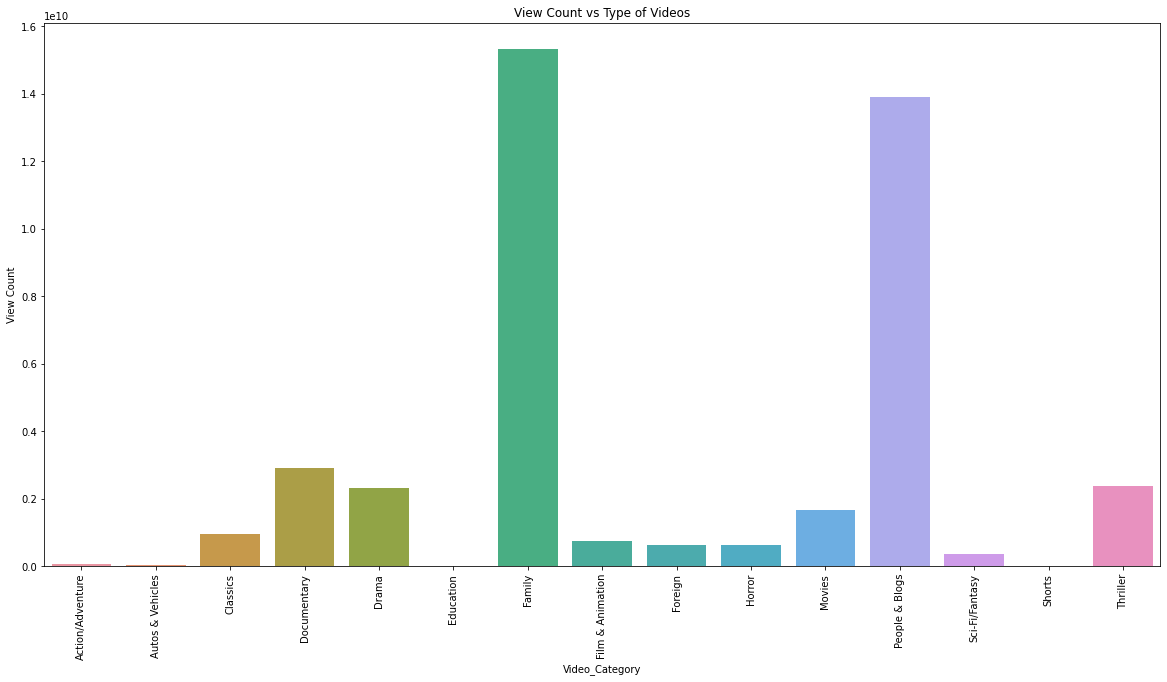

In [17]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("View Count vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.view_count)

# Add label for vertical axis
plt.ylabel("View Count")

The Above Data infers:
1. All the videos uploaded are categorised to 14 Types.
2. Out of all, **People & Blogs and Family has highest view count**, Likes and Dislikes.

But is that right way of analysis?
1. Dislikes would be more as there are more views. Shouldn't we consider the percentage ?
2. Does highest views say that the public are highly interested in watching those Category videos?

Let's dive deep further to understand even more


**Usually, In most cases, viewers just watch the video and turn to other video without Liking/Disliking/Commenting. But if they responded to a video in like/comment/dislike then that does signifies something and we need to capture that.**

Let me create a Response percentage column which signifies the public response to a video and engagement b/w viewers and the video

In [18]:
df_Views_Analysis["Response_Percentage"] = ( df_Views_Analysis.Likes + df_Views_Analysis.Dislikes ) * 100 /df_Views_Analysis.view_count
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage
0,Action/Adventure,73576237,5900521,186641,8.273272
1,Autos & Vehicles,50109853,1969463,73092,4.076154
2,Classics,968587881,72405230,1791133,7.660261
3,Documentary,2904848359,136030081,5162023,4.860567
4,Drama,2337329107,170751712,4586371,7.501643
5,Education,1465643,52477,1337,3.671699
6,Family,15340505997,489144378,32859598,3.402782
7,Film & Animation,754167453,21180545,2827615,3.183399
8,Foreign,636729423,13257676,2909208,2.539051
9,Horror,646966383,26324690,1431082,4.290141


# Public Response vs Type of Videos

Text(0, 0.5, 'Public Response(in percentage)')

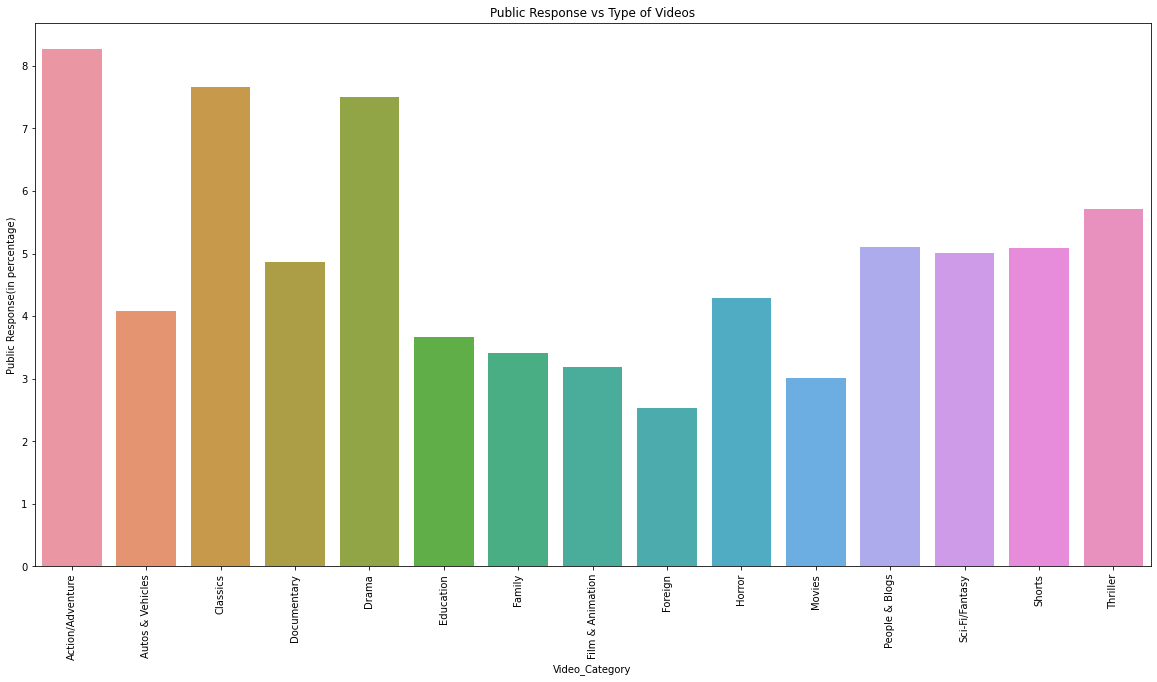

In [19]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Public Response vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.Response_Percentage)

# Add label for vertical axis
plt.ylabel("Public Response(in percentage)")

So now,
We can see that Viewers are highly reacting to Action/Adventure , Classics, Drama Videos. Let's randomly see what those videos are

In [20]:
df_maxViews[df_maxViews.Video_Category.isin(["Action/Adventure","Classics","Drama"])].sample(20)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,Video_Category
59888,lop7rGDHMsw,Lockdown 3.0 Paavangal | Parithabangal,2021-06-17T12:30:12Z,Parithabangal,23,2021-06-24T00:00:00Z,2221863,179044,2222,6068,Drama
49191,v5iJcopxDDQ,Who is Gyansujan?,2021-05-06T01:30:04Z,Gyan Gaming,20,2021-05-07T00:00:00Z,2740598,480281,4719,9859,Classics
42339,WeU7qU8O1N8,"We bought a new Flat, Kochi's First Skyvilla P...",2021-03-26T06:30:01Z,Tech Travel Eat by Sujith Bhakthan,19,2021-03-29T00:00:00Z,637406,29605,830,2477,Action/Adventure
62054,hedTMU0rSS0,Brother Nikar #shorts #comedyshorts,2021-07-03T15:21:14Z,Aakash Gupta,23,2021-07-06T00:00:00Z,189596,20170,155,266,Drama
55151,GNTsybJeB1Y,Desi Cricket | the mridul | Pragati | Nitin,2021-05-31T12:30:02Z,The MriDul,23,2021-06-08T00:00:00Z,5395536,203277,13561,12270,Drama
50813,jZ-_AG52rS0,I Got All Legendary M1887 Skins In One Token B...,2021-05-11T21:01:47Z,MDs Games Station,20,2021-05-17T00:00:00Z,1672975,72549,4238,2056,Classics
24264,Q7IdYRG6Sdk,Nepotism in Comedy,2020-12-16T15:15:14Z,Amit Tandon,23,2020-12-20T00:00:00Z,298897,15091,470,467,Drama
14896,GTU01nVy7D4,Apple Event | Malayalam Sketch | Arun Pradeep,2020-10-25T11:20:16Z,Arun Pradeep,23,2020-10-29T00:00:00Z,462805,66867,825,3066,Drama
45996,iPVLx_mno8g,KAHANI NOOR BHAI KE GHAR KI || 4K EPISODE 2 ||...,2021-04-13T12:05:53Z,Shehbaaz khan,23,2021-04-17T00:00:00Z,332694,17213,562,822,Drama
4570,HTcVph_vRxI,Badi Behan Vs. Choti Behan | SAMREEN ALI,2020-08-29T08:30:00Z,Samreen Ali,23,2020-09-04T00:00:00Z,1232082,52042,6455,5442,Drama


Let's create Similar Percentages and see what they infer

In [21]:
df_Views_Analysis["LikesPercentage"] = df_Views_Analysis.Likes*100/df_Views_Analysis.view_count
df_Views_Analysis["DislikesPercentage"] = df_Views_Analysis.Dislikes*100/df_Views_Analysis.view_count
df_Views_Analysis["Comments"] = df_Comments["comment_count"]
df_Views_Analysis["CommentsPercentage"] = df_Views_Analysis.Comments*100/df_Views_Analysis.view_count
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage,LikesPercentage,DislikesPercentage,Comments,CommentsPercentage
0,Action/Adventure,73576237,5900521,186641,8.273272,8.019601,0.253670,767773,1.043507
1,Autos & Vehicles,50109853,1969463,73092,4.076154,3.930291,0.145864,134255,0.267921
2,Classics,968587881,72405230,1791133,7.660261,7.475339,0.184922,4659107,0.481021
3,Documentary,2904848359,136030081,5162023,4.860567,4.682863,0.177704,10184177,0.350592
4,Drama,2337329107,170751712,4586371,7.501643,7.305420,0.196223,10171152,0.435161
5,Education,1465643,52477,1337,3.671699,3.580476,0.091223,2454,0.167435
6,Family,15340505997,489144378,32859598,3.402782,3.188580,0.214202,32869810,0.214268
7,Film & Animation,754167453,21180545,2827615,3.183399,2.808467,0.374932,1543524,0.204666
8,Foreign,636729423,13257676,2909208,2.539051,2.082152,0.456899,1660051,0.260715
9,Horror,646966383,26324690,1431082,4.290141,4.068942,0.221199,1803840,0.278815


<AxesSubplot:xlabel='Video_Category'>

<Figure size 1440x720 with 0 Axes>

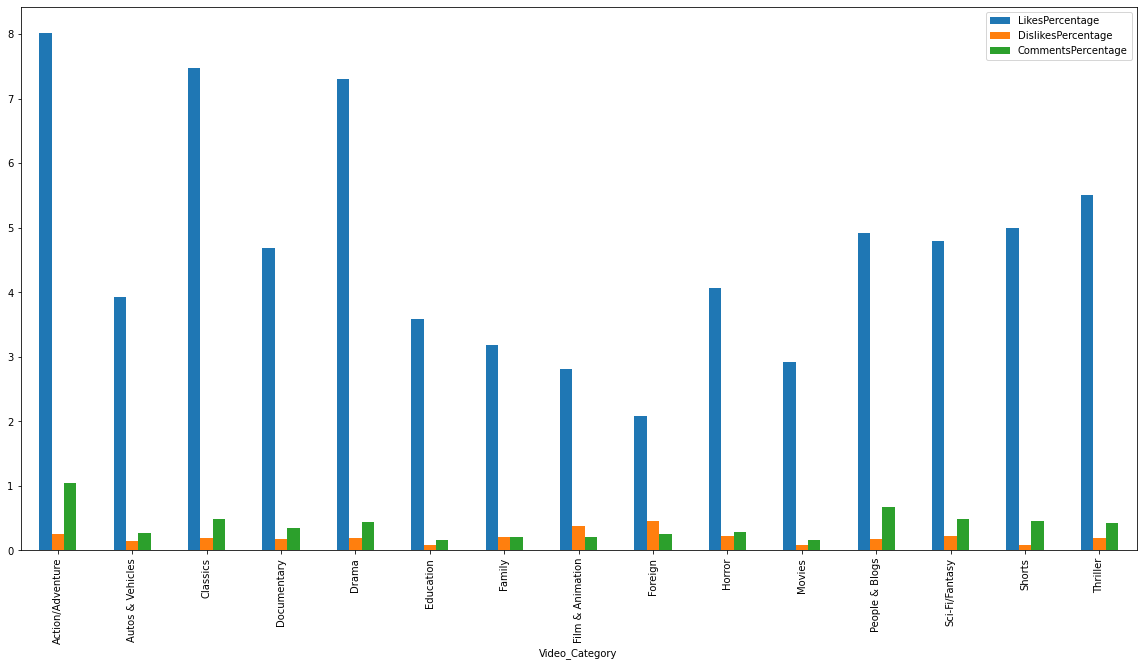

In [22]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

df_Views_Analysis.plot(x="Video_Category", y=["LikesPercentage", "DislikesPercentage", "CommentsPercentage"], kind="bar",figsize=(20,10))


Text(0, 0.5, 'ViewCount')

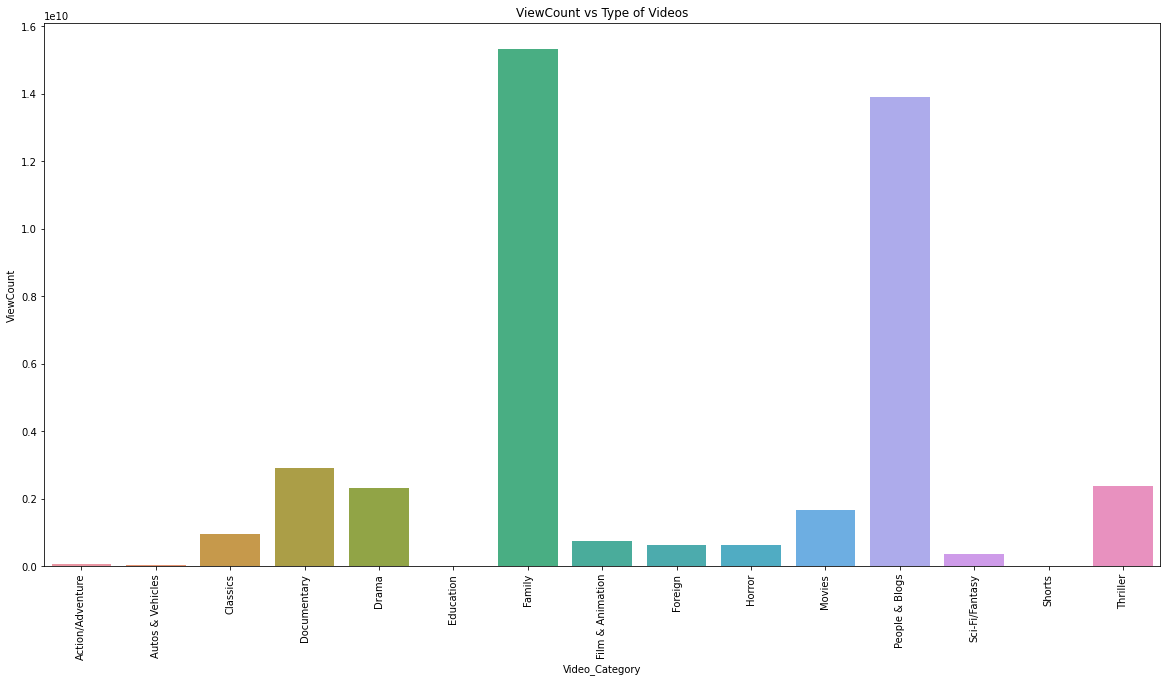

In [23]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("ViewCount vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.view_count)

# Add label for vertical axis
plt.ylabel("ViewCount")

# CommentsPercentage vs Type of Videos

Text(0, 0.5, 'Comments')

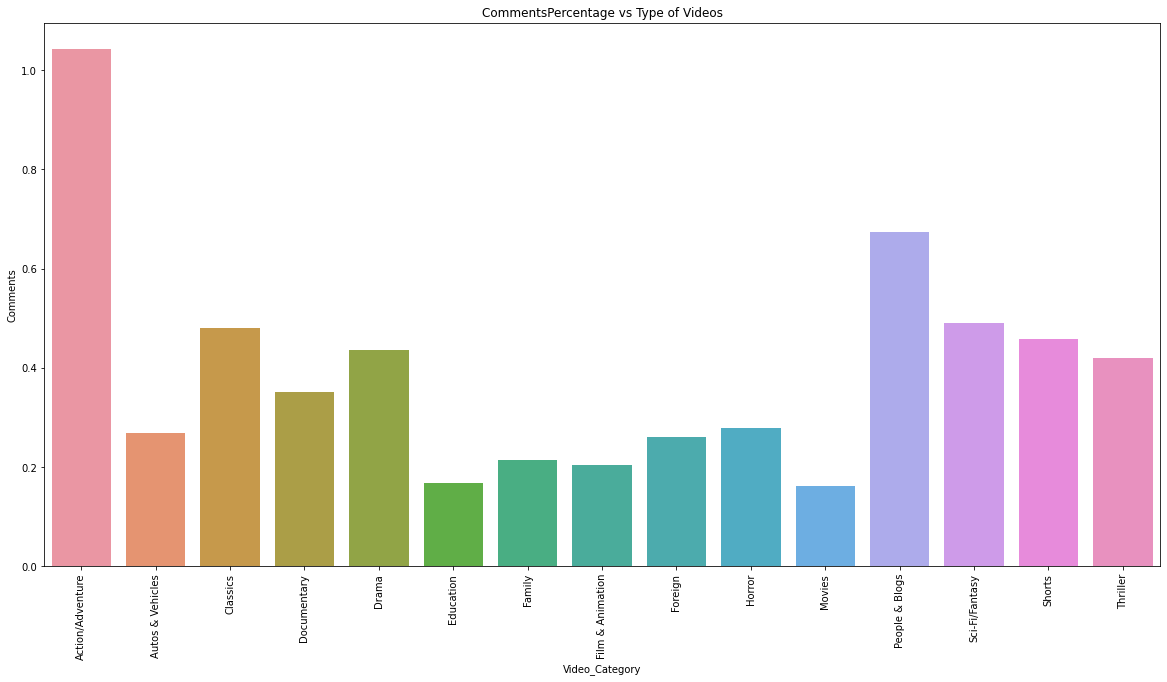

In [24]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("CommentsPercentage vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.CommentsPercentage)

# Add label for vertical axis
plt.ylabel("Comments")

From above graphs, We can understand that people tend to comment more over Action/Adventure Category Videos. Let's see few such data

In [25]:
df_maxViews[df_maxViews.Video_Category.isin(["Action/Adventure"])].sample(10)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,Video_Category
13149,8CL8KIh_yjc,"കുത്തി കരയിപ്പിച്ചു, Last Video From Serbia",2020-10-18T04:30:01Z,Mallu Traveler,19,2020-10-19T00:00:00Z,564302,45627,1364,4686,Action/Adventure
35244,XUXfx_h5DDE,Meri Sabse Badi Khwahish #HunkCity,2021-02-18T12:52:12Z,Sahil Khan,19,2021-02-20T00:00:00Z,377944,37064,465,1068,Action/Adventure
7769,hlcdSzUTeGY,GUYS പണി പാളി 😒 എന്നെ ഇവർ പൊക്കി,2020-09-17T08:15:01Z,Mallu Traveler,19,2020-09-21T00:00:00Z,720498,51632,3197,12369,Action/Adventure
26106,X0paHtan-_A,Finally Bought My Dream Touring Bike - BMW 😍,2020-12-27T08:27:24Z,Jatt Prabhjot,19,2020-12-31T00:00:00Z,979057,117508,2191,17044,Action/Adventure
42309,Hm4OB6Akla8,Jathi Ratnalu | Anudeep - Ravi candid Counters...,2021-03-25T12:05:44Z,Street Byte,19,2021-03-29T00:00:00Z,719572,19422,723,1184,Action/Adventure
20627,lrAgintXCH4,A new Food Experience in Vijayawada | Amma Bir...,2020-11-27T09:44:28Z,Street Byte,19,2020-11-30T00:00:00Z,255682,8110,281,480,Action/Adventure
16629,wRsuCocAC7I,പുതിയ വാച്ച് മേടിച്ചു വന്ന വഴിക്ക് വെള്ളത്തിൽ ...,2020-11-04T11:30:03Z,Fishing Freaks,19,2020-11-07T00:00:00Z,1050463,97247,2228,25121,Action/Adventure
9582,O8bieTQXThc,Arabian Thai Food!! GIANT BIRYANI MOUNTAIN in ...,2020-09-27T13:00:29Z,Mark Wiens,19,2020-09-30T00:00:00Z,854270,24770,793,2184,Action/Adventure
43740,6wvjwwZnWk8,We bought a new Car for Achan !!,2021-04-01T06:30:01Z,Tech Travel Eat by Sujith Bhakthan,19,2021-04-05T00:00:00Z,1115193,25289,40084,17712,Action/Adventure
49036,n1oscM6mhUw,സർപ്രൈസ് ഞങ്ങൾ വെളിപ്പെടുത്തുന്നു ✨️|| Happy M...,2021-05-03T13:47:34Z,Avi vlogz,19,2021-05-06T00:00:00Z,305164,18654,495,1985,Action/Adventure


# DislikesPercentage vs Type of Videos

Text(0, 0.5, 'Dislikes')

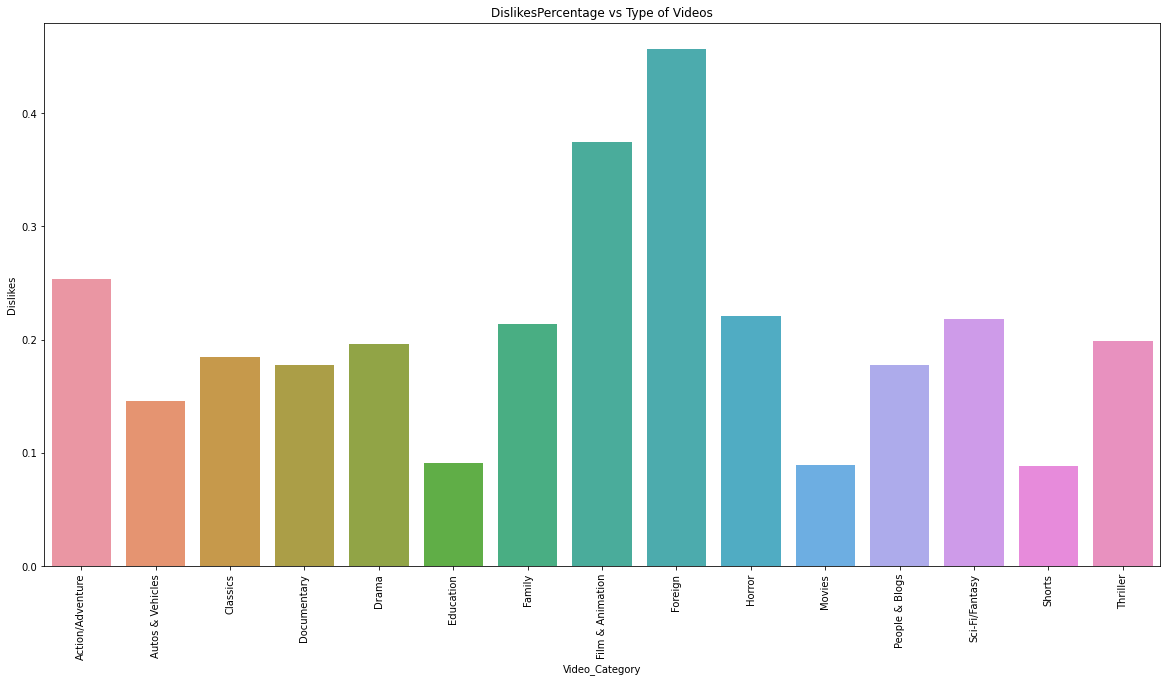

In [26]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("DislikesPercentage vs Type of Videos")

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.DislikesPercentage)

# Add label for vertical axis
plt.ylabel("Dislikes")

Seems like viewers disliked videos of type Foerign,Film and Animation. Let's see few of them

In [27]:
df_maxViews[df_maxViews.Video_Category.isin(["Foreign","Film & Animation"])].sample(10)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,Video_Category
311,zaU_JPFHRs8,DNA: Russia August 12 को लॉन्च करेगा Corona Va...,2020-08-10T17:38:12Z,Zee News,25,2020-08-13T00:00:00Z,1630807,31759,2865,1904,Foreign
40559,6sOfQpcoIog,"இன்று வேட்பு மனு தாக்கல் செய்கிறார், தே.மு.தி....",2021-03-18T05:43:01Z,Captain News,25,2021-03-20T00:00:00Z,102226,1377,139,133,Foreign
24254,HnxdBfc-8g4,Vidhan Sabha Live : Ajit Pawar यांनी BJP ला दि...,2020-12-15T12:48:01Z,Mumbai Tak,25,2020-12-20T00:00:00Z,320313,4647,363,356,Foreign
46574,ypyqjwj-KUQ,Enga Amma Appa Ashwin oda Crushuku ena sonnaga...,2021-04-16T10:00:03Z,BehindwoodsTV,1,2021-04-20T00:00:00Z,3739915,178007,2066,4528,Film & Animation
41954,OAW1K26jEt0,Saregamapa Winner Yasaswi Kondepudi Singing So...,2021-03-22T03:36:38Z,Mirror Tv,25,2021-03-27T00:00:00Z,1736094,22707,1331,711,Foreign
41707,pkiAVuLPbew,சோகமா இருக்கீங்களா? இத பாருங்க! 🤣CWC Gang Atro...,2021-03-22T10:00:15Z,BehindwoodsTV,1,2021-03-26T00:00:00Z,5006738,157169,4202,3620,Film & Animation
21615,Jh9KkZ067Ds,Farmers' Protest | Wrestler The Great Khali Jo...,2020-12-03T04:57:18Z,The Quint,25,2020-12-05T00:00:00Z,320148,25247,601,1922,Foreign
25189,AVpnfKegG58,Farm Laws: Shri Rahul Gandhi addresses the med...,2020-12-24T07:44:08Z,Indian National Congress,25,2020-12-25T00:00:00Z,50735,0,0,486,Foreign
34344,8ifod3fctl8,Ghulam Nabi Azad's farewell speech in Rajya Sabha,2021-02-09T07:42:53Z,DD News,25,2021-02-15T00:00:00Z,1304514,29613,1302,0,Foreign
20628,ZT3T9zHsoOA,Farmer Protest : Punjab के प्रदर्शनकारी किसानो...,2020-11-28T13:08:51Z,BBC News Hindi,25,2020-11-30T00:00:00Z,444541,0,0,1766,Foreign


# LikesPercentage vs Type of Videos

Text(0, 0.5, 'Likes')

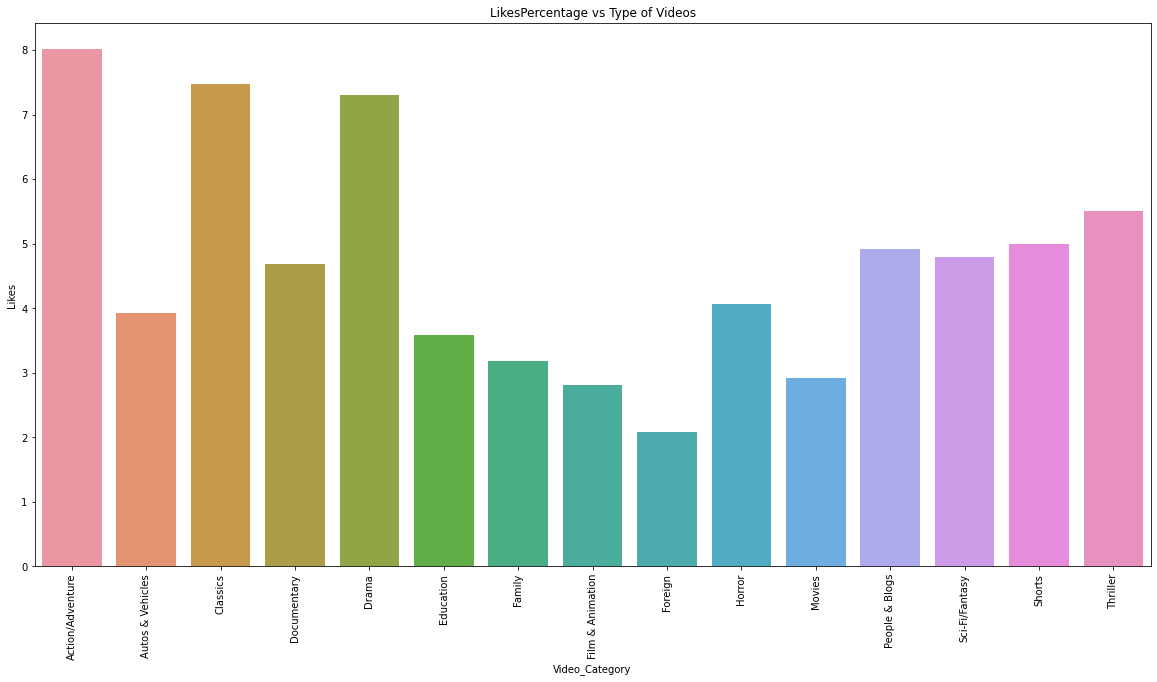

In [28]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("LikesPercentage vs Type of Videos")

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.LikesPercentage)

# Add label for vertical axis
plt.ylabel("Likes")

Highest like percentage is for Action/Adventure, Classics and Drama

# Channel Analysis

In [29]:
df_Channel = df_maxViews.groupby('channelTitle')["view_count"].sum().reset_index()
df_Like = df_maxViews.groupby('channelTitle')["likes"].sum().reset_index()
df_Dislike = df_maxViews.groupby('channelTitle')["dislikes"].sum().reset_index()
df_Comments = df_maxViews.groupby('channelTitle')["comment_count"].sum().reset_index()
df_Channel["Likes"] = df_Like.likes
df_Channel["Dislikes"] = df_Dislike.dislikes
df_Channel["Comments"] = df_Comments.comment_count

df_Channel.sample(10)

,channelTitle,view_count,Likes,Dislikes,Comments
576,Foodie We,2751274,280946,4982,19620
455,Dilli Aajtak,223152,5600,319,303
1199,News18 Punjab/Haryana/Himachal,526815,25003,1002,2306
2160,eFootball PES,741940,53334,880,3508
1733,SumiS Tasty Kitchen,228872,22622,580,13247
669,HRX Brand,3536586,64177,3714,460
1667,Sony Pictures Entertainment,10580585,203238,19968,15510
1614,ShyStyles Vlogs,5372729,313366,13279,19327
226,BBC News Telugu,4458917,76461,1882,3247
2069,We 3,468786,6640,1026,241


In [30]:
df_Channel.sort_values('view_count', ascending=False).iloc[:25,:]

,channelTitle,view_count,Likes,Dislikes,Comments
1764,T-Series,1702535736,49348834,2774904,3733404
2032,Vijay Television,1351573148,26838105,654303,2347946
232,BLACKPINK,702317466,62026802,1618570,8565641
373,Colors TV,687937893,8840745,428432,205550
276,Big Hit Labels,629188826,62039736,1306338,13240859
1809,Taarak Mehta Ka Ooltah Chashmah,565475637,9688019,630555,350865
2118,ZEE5,506741558,6283865,216647,137722
386,Crazy XYZ,486622193,36948138,1397020,2424869
673,HYBE LABELS,486006419,43231248,338678,11226969
1110,MrBeast,476915179,31368905,366240,2433329


# Channel vs total views

Text(0, 0.5, 'Total Views')

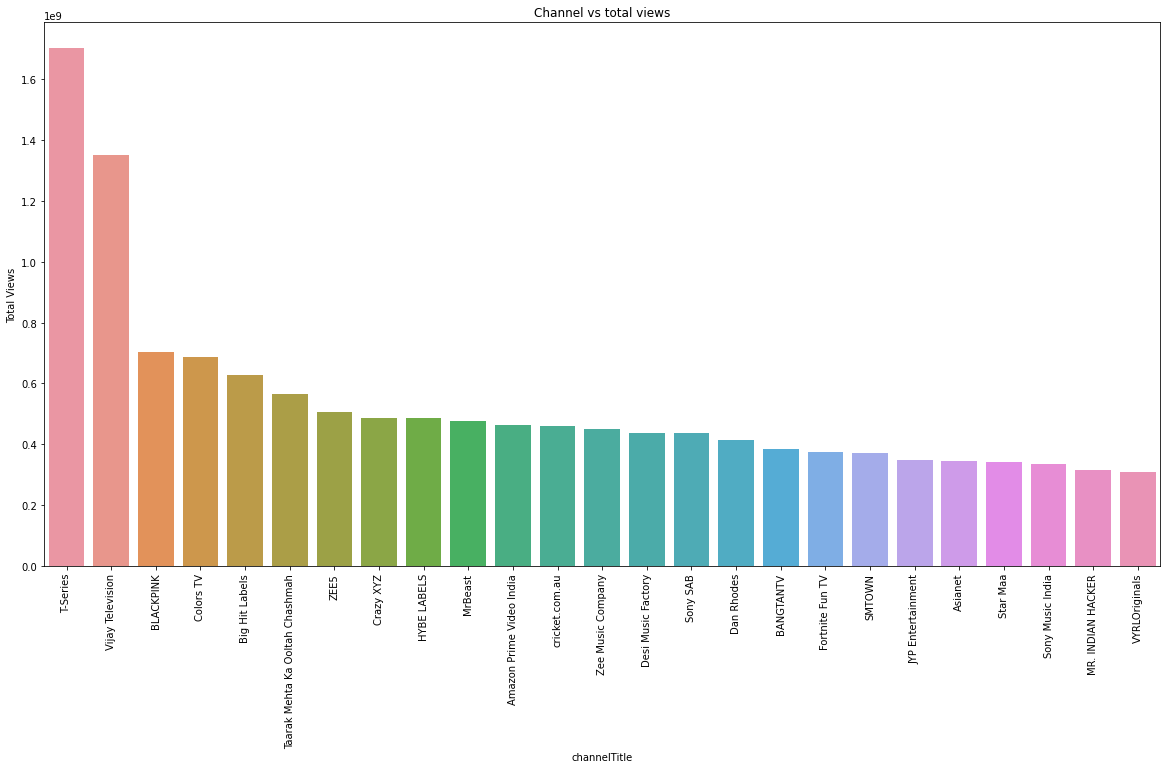

In [31]:
Channel_Views = df_Channel.sort_values('view_count', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total views")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.view_count)

# Add label for vertical axis
plt.ylabel("Total Views")

# Channel vs total Likes

Text(0, 0.5, 'Total Likes')

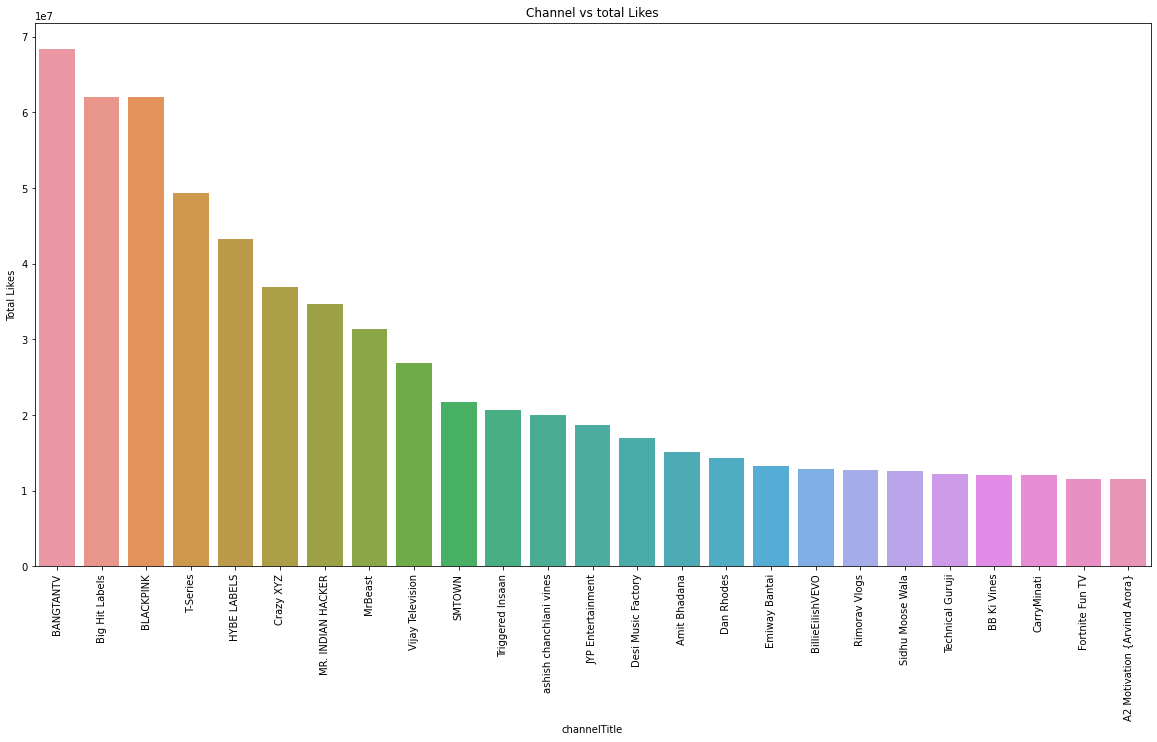

In [32]:
Channel_Views = df_Channel.sort_values('Likes', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Likes")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Likes)

# Add label for vertical axis
plt.ylabel("Total Likes")

# Channel vs total Comments

Text(0, 0.5, 'Total Comments')

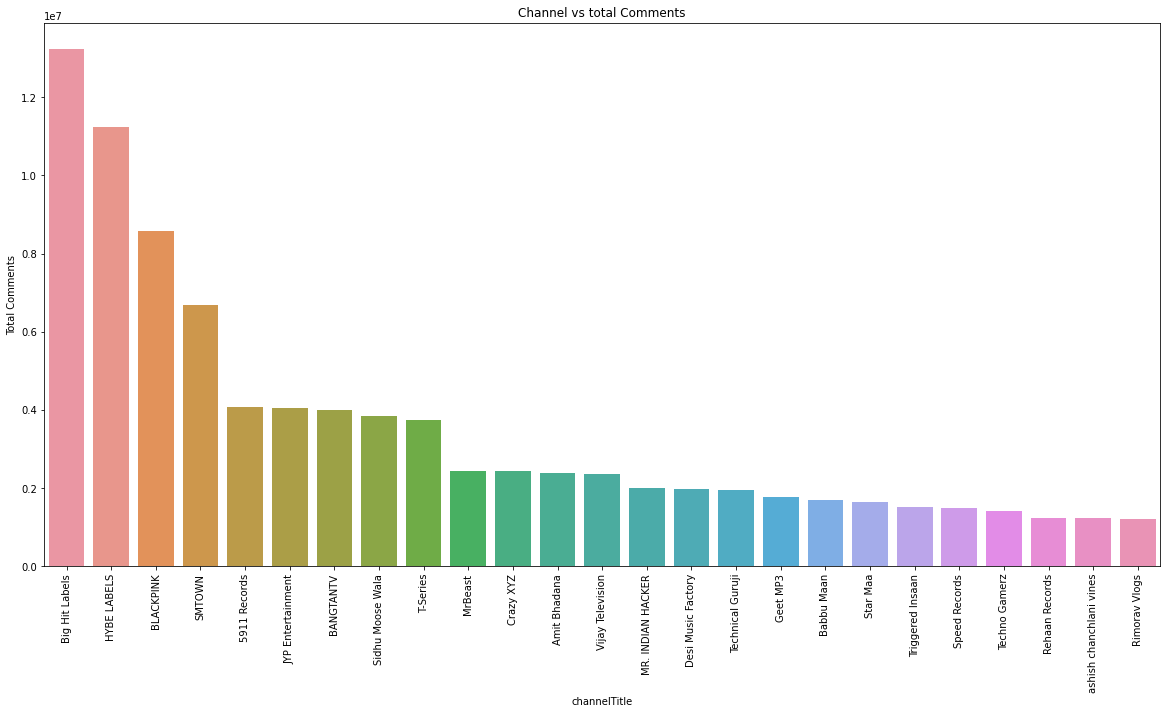

In [33]:
Channel_Views = df_Channel.sort_values('Comments', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Comments")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Comments)

# Add label for vertical axis
plt.ylabel("Total Comments")

Let's try some different analysis now

In [34]:
def fetch_video_times(value):
    return NoOfDaysInTrending[value]

Let's try to find the Channels that have their videos in trending for most of the times.

In [35]:
df_maxViews["times_in_trending"] = df_maxViews.video_id.apply(fetch_video_times)
df_maxViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,Video_Category,times_in_trending
48320,tIZSZUiC4sM,Yaaran Vich Rabb (Video) Ekam Sudhar - R Nait ...,2021-04-28T06:09:46Z,Bamb Beats,10,2021-05-01T00:00:00Z,2214150,21759,515,1877,People & Blogs,3
39812,OSNUySDn8Lw,The Priest Malayalam Movie Review by Sudhish P...,2021-03-12T12:43:44Z,Monsoon Media,24,2021-03-16T00:00:00Z,250972,11633,284,1257,Family,4
60771,Er4UfULQzfg,कौनसा खेल खेला Gokuldham ने? -Taarak Mehta Ka ...,2021-06-28T15:30:01Z,Sony SAB,24,2021-06-30T00:00:00Z,1516459,21105,1852,820,Family,2
10657,AqHDR2oow8c,Kohli भाई! ऐसे कौन हारता है? | RCB vs DC | Mat...,2020-10-06T04:28:25Z,RJ Raunac No-Po,24,2020-10-06T00:00:00Z,493910,48932,1605,2406,Family,1
37749,yLATxq0Yg7w,Behen Ok Please - Friendzone ft. Shreya Gupto ...,2021-03-04T06:30:16Z,Girliyapa,24,2021-03-05T00:00:00Z,101347,6723,320,129,Family,1


Top 25 Videos that are in trending for many days 

In [36]:
df_trend_video_tt = df_maxViews.sort_values('times_in_trending', ascending=False).iloc[:25,:]
df_trend_video_tt

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,Video_Category,times_in_trending
58680,y_RHQ4mBDKA,"Bedardi Se Pyaar Ka Song|Jubin N,Meet B,Manoj ...",2021-06-08T05:30:44Z,T-Series,10,2021-06-17T00:00:00Z,46351646,1585497,44771,77470,People & Blogs,19
56622,KVh4KtUSW3A,"Baarish Ban Jaana (Official Video) Payal Dev, ...",2021-06-03T05:30:20Z,VYRLOriginals,10,2021-06-12T00:00:00Z,46199357,984341,33052,110202,People & Blogs,18
56632,pYDdDIdiSFY,KFC Style Crispy Chicken Fry🍗 #Jamamasjid #del...,2021-06-02T07:25:15Z,INDIA EAT MANIA,24,2021-06-12T00:00:00Z,29970151,636668,43574,5711,Family,18
54983,Hjj9nrjvpZo,She thought she pranked me 😂🤷‍♂️ #shorts,2021-05-28T09:30:01Z,Suyash Vlogs,24,2021-06-07T00:00:00Z,42645272,691428,60115,1764,Family,17
54976,LtLJRNBHOKc,Online Parent Teacher Meeting | Ashish Chanchlani,2021-05-29T08:35:32Z,ashish chanchlani vines,23,2021-06-07T00:00:00Z,20645862,2311665,31993,110663,Drama,17
57399,oiBif8SefIg,LOCKDOWN WITH COUSIN ( Episode -2 ) || Rachit ...,2021-06-06T04:07:00Z,Rachit Rojha,24,2021-06-14T00:00:00Z,7987529,243058,19726,20730,Family,16
58637,nFjVlf2r9_Q,Badshah - Paani Paani | Jacqueline Fernandez |...,2021-06-09T06:30:27Z,Saregama Music,10,2021-06-17T00:00:00Z,76252340,1417028,153022,86156,People & Blogs,16
55515,2OtgYcd83Qg,"Jagame Thandhiram | Trailer | Dhanush, Aishwar...",2021-06-01T04:30:00Z,Netflix India,24,2021-06-09T00:00:00Z,11209237,571223,11929,27549,Family,16
56254,AzOvsmpQVKM,Jubin Nautiyal : Kabira (कबीर दोहे) | Raaj Aas...,2021-06-03T03:30:35Z,T-Series,10,2021-06-11T00:00:00Z,18970641,1363032,21272,80926,People & Blogs,16
56996,GbwpvjAEZv0,Great Khali's Instagram is The Funniest - Try ...,2021-06-05T07:00:02Z,Triggered Insaan,23,2021-06-13T00:00:00Z,10226184,1034148,28653,61954,Drama,16


Top Channels whose video is in trending for most of the times

# Channel's Video vs no.of times in Trending

Text(0, 0.5, 'no.of trending')

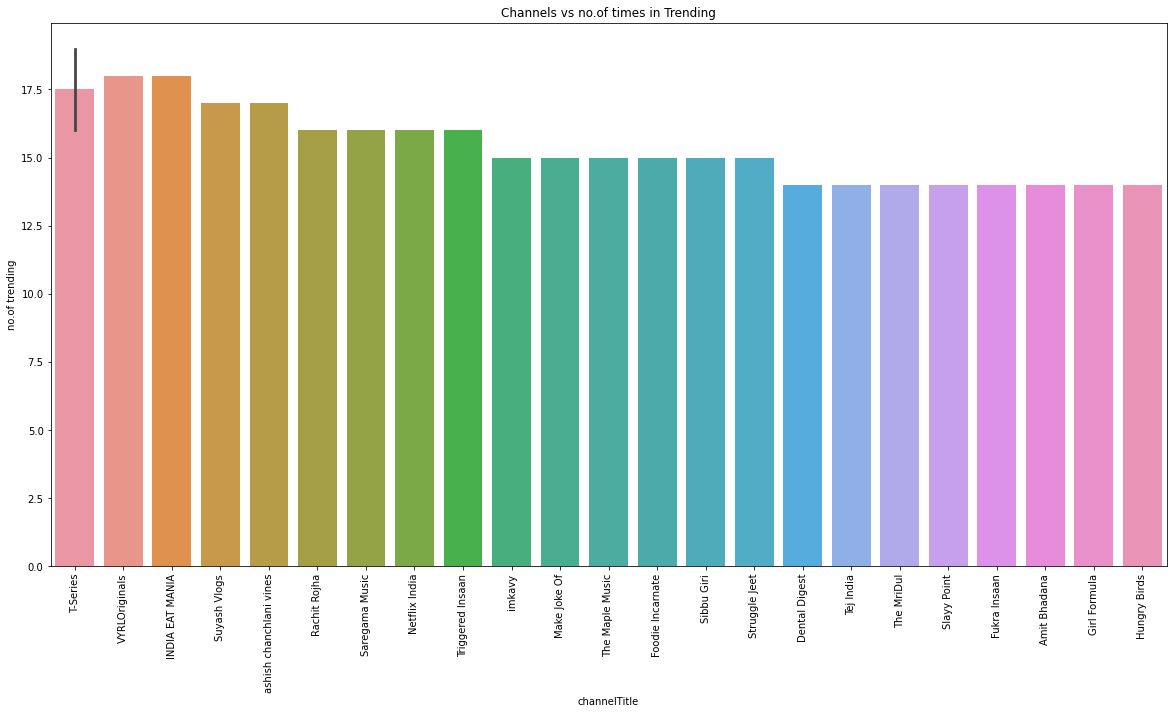

In [37]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channels vs no.of times in Trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_trend_video_tt.channelTitle, y=df_trend_video_tt.times_in_trending)
#sns.violinplot(x = df_trend_video_tt.channelTitle, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("no.of trending")

Top 30 Channels whose Videos are in Trending

In [38]:
df_Channel_Trending = df_maxViews.groupby("channelTitle")["times_in_trending"].sum().reset_index()
df_Channel_Trending["Majority_Videos_Category_Type"] = df_maxViews.groupby('channelTitle')['Video_Category'].agg(pd.Series.mode).reset_index()["Video_Category"]
df_Channel_Trending = df_Channel_Trending.sort_values('times_in_trending', ascending=False).iloc[:30,:]
df_Channel_Trending

,channelTitle,times_in_trending,Majority_Videos_Category_Type
2032,Vijay Television,921,Family
373,Colors TV,906,Family
2118,ZEE5,683,Family
196,Asianet,602,Family
1669,Sony SAB,544,Family
386,Crazy XYZ,522,Thriller
1809,Taarak Mehta Ka Ooltah Chashmah,424,Family
1764,T-Series,404,People & Blogs
568,Flowers Comedy,374,Family
1737,Sun TV,312,Family


# Channel vs total no.of times in trending

Text(0, 0.5, 'no.of times in trending')

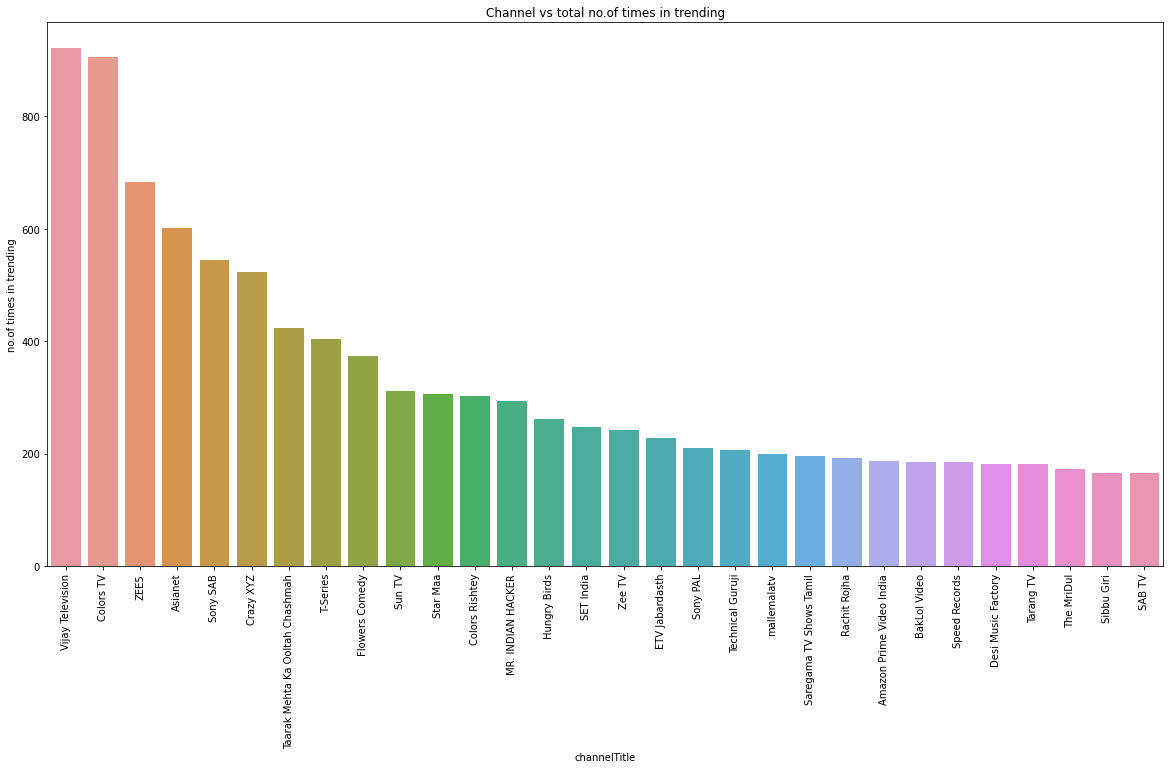

In [39]:

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_Channel_Trending.channelTitle, y=df_Channel_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

Category of the Videos Uploaded of Top Channels which are in Trending

# Category vs total no.of times in trending

Text(0, 0.5, 'no.of times in trending')

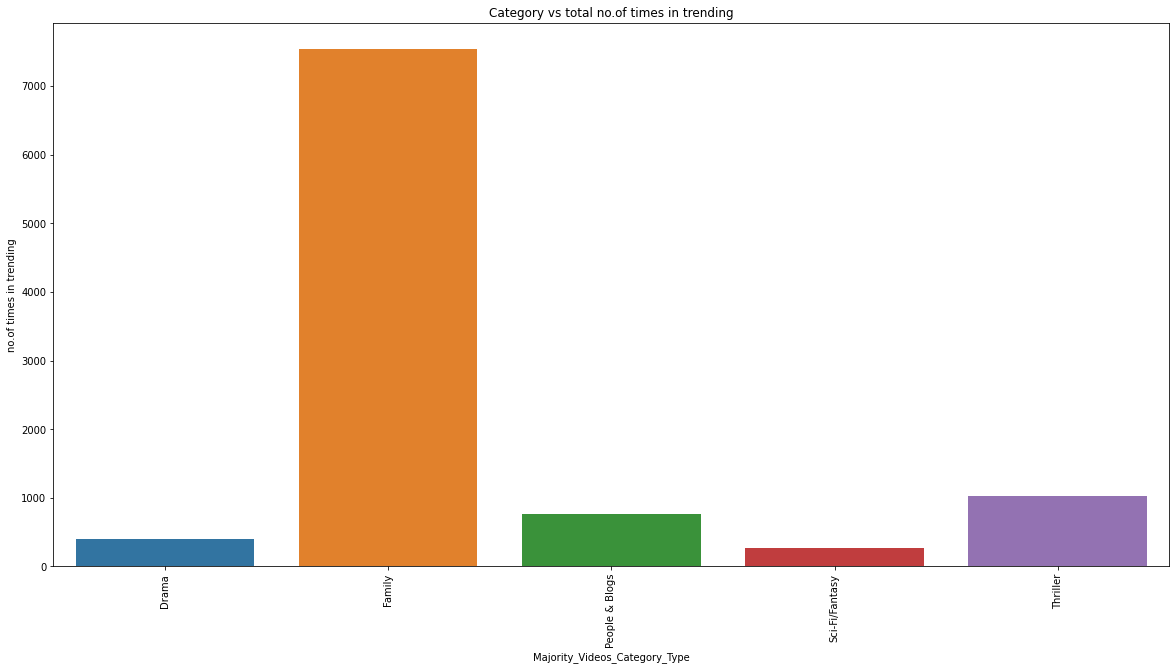

In [40]:

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Category vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)
Category_Trending = df_Channel_Trending.groupby("Majority_Videos_Category_Type")["times_in_trending"].sum().reset_index()
sns.barplot(x=Category_Trending.Majority_Videos_Category_Type, y=Category_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

In [41]:
pd.Timestamp(df_minViews.trending_date[1])

Timestamp('2020-08-12 00:00:00+0000', tz='UTC')

Let's create a column which calculates no.days took for the video to be in Trending.
0 being less than 24hrs

In [42]:
df_minViews["JoinedTrending"] = pd.to_datetime(df_minViews.trending_date.str.split(',\s*').str[0])
df_minViews["UploadedTime"] = pd.to_datetime(df_minViews.publishedAt.str.split(',\s*').str[0])
df_minViews["DaysTakenToBeOnTrending"] = (df_minViews["JoinedTrending"] - df_minViews["UploadedTime"]).dt.days
df_minViews['DaysTakenToBeOnTrending'] = df_minViews['DaysTakenToBeOnTrending'].apply(lambda x: 0 if x == -1 else x)
df_minViews.sample(10)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,Video_Category,JoinedTrending,UploadedTime,DaysTakenToBeOnTrending
15239,INQYG0pXAcc,Mirzapur S2 l Mirzapur Season 2 l Shighrapatan...,2020-10-30T14:45:11Z,Ootpataang Productions,23,2020-10-31T00:00:00Z,44881,942,83,102,Drama,2020-10-31 00:00:00+00:00,2020-10-30 14:45:11+00:00,0
9695,vK47A5BNPvI,Andaru dongale..Evaru pedda donga anedi chudam...,2020-09-30T05:22:17Z,Star Maa,24,2020-10-01T00:00:00Z,2179419,41234,1027,12948,Family,2020-10-01 00:00:00+00:00,2020-09-30 05:22:17+00:00,0
29193,9GSpBNYT3Kw,"ആണും, സ്നേഹവും, കാമവും | Story Of Two Men",2021-01-16T12:30:10Z,Joseph Annamkutty Jose,24,2021-01-17T00:00:00Z,92178,10474,66,574,Family,2021-01-17 00:00:00+00:00,2021-01-16 12:30:10+00:00,0
26908,nWX3rstp5AE,Kalyana Vaibhogam | Premiere Episode 934 Previ...,2021-01-04T09:30:03Z,ZEE5,24,2021-01-05T00:00:00Z,533304,4964,212,243,Family,2021-01-05 00:00:00+00:00,2021-01-04 09:30:03+00:00,0
11704,gZmsTZrhq5E,"Russia की Syria के खिलाफ बहुत बड़ी कार्रवाई, स...",2020-10-11T11:24:01Z,TV9 Bharatvarsh,25,2020-10-12T00:00:00Z,366815,7671,389,356,Foreign,2020-10-12 00:00:00+00:00,2020-10-11 11:24:01+00:00,0
54465,i_G7AoN5wuA,TECHNO GAMERZ IN PRISON IN HEROBRINE SMP | MIN...,2021-06-05T07:00:10Z,Chapati Hindustani Gamer,20,2021-06-06T00:00:00Z,2049740,148689,4252,6329,Classics,2021-06-06 00:00:00+00:00,2021-06-05 07:00:10+00:00,0
38082,YdW5wT2ZXiI,Namak Issk Ka | नमक इस्क का | Episode 65 | Com...,2021-03-06T08:30:02Z,Colors TV,24,2021-03-07T00:00:00Z,1633722,19773,525,431,Family,2021-03-07 00:00:00+00:00,2021-03-06 08:30:02+00:00,0
50845,p7DgohybDdk,Last Pubg Mobile video | @SOUL VipeR @SoulAm...,2021-05-18T05:30:16Z,MortaL,22,2021-05-18T00:00:00Z,866241,143129,1523,3401,Documentary,2021-05-18 00:00:00+00:00,2021-05-18 05:30:16+00:00,0
29928,Oe0_NIXpl_I,"ജാബിക്ക് PRANK കൊടുത്തു, അവസാനം കയ്യീന്ന് പോയി...",2021-01-20T14:10:11Z,Jabish,22,2021-01-21T00:00:00Z,156092,7849,1645,1208,Documentary,2021-01-21 00:00:00+00:00,2021-01-20 14:10:11+00:00,0
15471,fXMUr5PayRg,Barrister Babu | बैरिस्टर बाबू | Ep. 123 | Bon...,2020-10-31T03:28:20Z,Colors TV,24,2020-11-01T00:00:00Z,678728,8091,311,145,Family,2020-11-01 00:00:00+00:00,2020-10-31 03:28:20+00:00,0


# Average no.of days took to be in trending

Text(0, 0.5, 'Avg no.of days')

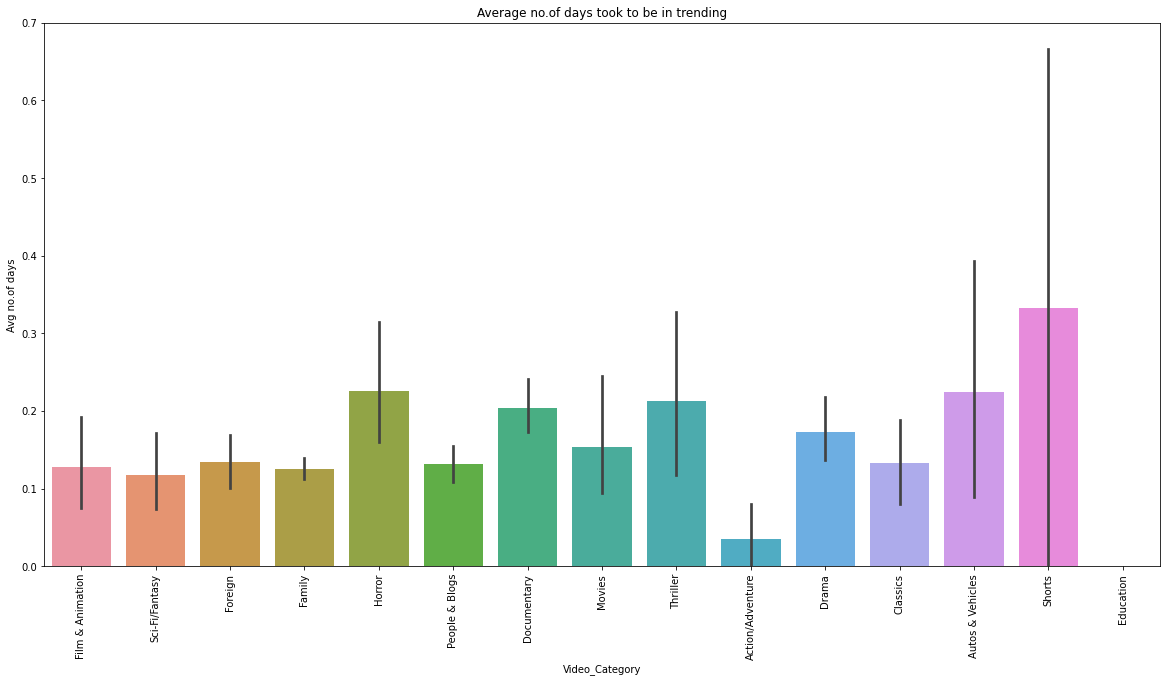

In [43]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Average no.of days took to be in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_minViews.Video_Category, y=df_minViews.DaysTakenToBeOnTrending)
#sns.violinplot(x = df_minViews.Video_Category, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("Avg no.of days")

(Will Add further analysis soon)